<a href="https://colab.research.google.com/github/daniellaparada/PyE-TDS/blob/main/4_Simulaci%C3%B3n_de_resultados_de_convergencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de resultados de convergencia

En este *notebook* estudiaremos empíricamente algunos resultados notables sobre convergencia que, no solo hemos estudiado en esta última posta del bloque de Probabilidades, sino que... ¡venimos explorando intuitivamente en estos notebooks desde el día! Los dos resultados sobre los que analizaremos empíricamente usando Python serán:

- la Ley de los Grandes Números (LGN), y
- el Teorema Central del Límite (TCL).

Estos resultados se dicen "de convergencia" pues presentan el resultado de una situación límite (¡sí, los mismos límites que ya estudiamos en EAM!).

Esta semana NO habrá trabajo de simulación, volveremos a encontrarnos con un trabajo a producir y entregar cuando iniciemos el bloque de Estadística.

In [1]:
# Cargamos las librerías que ya estudiamos en el notebook 1
import numpy as np
import random as rd

# Pero vamos a usar algunas más...
# De scipy importamos stats para poder tener generadores de muestras provenientes
# de las variables aleatorias usuales (https://docs.scipy.org/doc/scipy/reference/stats.html)
from scipy import stats

# E importamos algunas más para poder hacer algunos gráficos útiles
import seaborn as sns
import matplotlib.pyplot as plt

# Fijamos una semilla para que todo sea reproducible
rd.seed(123)

# Y definimos unos parámetros estéticos de seaborn para que todo luzca mejor
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Para evitar que nos aparezcan resultados en notación científica
np.set_printoptions(suppress=True)

## Ley de los grandes números

### Ejemplo 1: Moneda cargada

Recordemos un ejemplo que simulamos en el Notebook 2, cuando recién comenzábamos a estudiar variables aleatorias. Tenemos una moneda cargada y la lanzamos una cierta cantidad de veces, digamos $N$.

En aquel momento, intuimos que una forma de estimar la probabilida de obtener "cara" en esta moneda cargada imaginaria, podía estimarse haciendo una simulación. ¿Cómo? A través de la frecuencia relativa, es decir, contando la cantidad de veces que obteníamos "cara" y dividiendo por el total de veces que habíamos repetido el experimento.

En su momento, nos había quedado algo más o menos como esto.

In [2]:
#### 1: Experimento aleatorio
moneda = list(range(0,2))

def experimento_moneda_cargada():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un número: 1, si éxito; 0, si fracaso
    '''
    resultado = rd.choices(moneda, weights=(0.3,0.7), k=1)
    return resultado

#### 2: Muestra aleatoria
rd.seed(123)
N = 10000
muestra = [experimento_moneda_cargada() for _ in range(N)]

#### 3: Una función _"filtro"_
def sale_cara(resultado):
    return resultado == [1]

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(1 for e in muestra if sale_cara(e))/N
print(f'Probabilidad aproximada de que salga cara, P(X=1), es', prob)

Probabilidad aproximada de que salga cara, P(X=1), es 0.7022


Modelemos el por qué es posible que esto funcione. Para ello, llamemos $X$ a la variable aleatoria con distribución Bernoulli de parámetro $p$ y digamos que $X$ toma el valor $1$ si sale "cara" al lanzar la moneda cargada y $0$, si no. Es decir,

$$R_X=\{0,1\},$$

y como la moneda está cargada

$$P(X=0)=P(\text{cruz})=1-p,$$

$$P(X=1)=P(\text{cara})=p.$$

Supongamos que queremos estimar $P(X=1)=p$ a partir de una simulación. Usamos la frecuencia relativa, muy bien, ¿pero qué significa eso? ¿Por qué "eso" podría relacionar con alguno de los resultados de convergencia que estudiamos? O, mejor dicho, ¿cómo es que se podría relacionar?

Para eso, comencemos a hablar de **muestras**. Pensemos en la muestra aleatoria $X_1, \cdots, X_n$ que contiene los resultados de $n$ lanzamientos de la moneda. Cada una de esas variables aleatoria se distribuye como la variable $X$ de la población. Es decir, las $X_i$ son todas variables aleatorias independientes y con igual distribución que $X$: Bernoulli de parámetro $p$,

$$
X_i\sim Be(p), \text{ para todo } i.
$$

**¿Pero, qué es la frecuencia relativa?** Contar cuántas veces sale el resultado de interés, que en este caso es $1$, y dividir por el total de repeticiones, que en ese caso es $n$.

Recordemos que, como las $X_i$ son Bernoulli, cada una de ellas toma el valor $1$ cuando sale "cara", y $0$ cuando no. Entonces, contar la cantidad de "caras" equivale a **sumar todos los resultados** de las $X_i$, pues se sumará un $1$ cuando salga "cara", y 0 en los demás casos. Por lo tanto, la frecuencia relativa, llamémosla $f_n$, puede definirse como

$$
f_n=\frac{\sum_{i=1}^n{X_i}}{n}=\overline{X}_n.
$$

Es decir, la frecuencia aleatoria es precisamente $\overline{X}_n$.

Y por la **Ley de los grandes números**, sabemos que $\overline{X}_n$ converge en probabilidad al parámetro $p$, pues $p=E(X)$.

Es decir, a medida que aumentamos $n$, la cantidad de repeticiones del experimento, la frecuencia relativa $f_n=\overline{X_n}$ converge al parámetro $p$, ¡que no conocemos, pero queremos conocer a partir de "los datos"! En casos como este, se dice que la frecuencia relativa es un **estimador** del parámetro $p$ que no conocemos.

Esto es lo que da el sustento matemático a esa intuición que seguramente todos tuvimos alguna vez, y a las simulaciones que estuvimos haciendo en la primera parte de esta posta.

En lo que sigue, vamos a ver cómo la **estimación** de $p$ mejora a medida que aumentamos la cantidad de repeiticiones del experimento, que en nuestro código, es $N$. Para no agregar una "fuente de ruido" adicional, lo ideal será fijar una semilla.

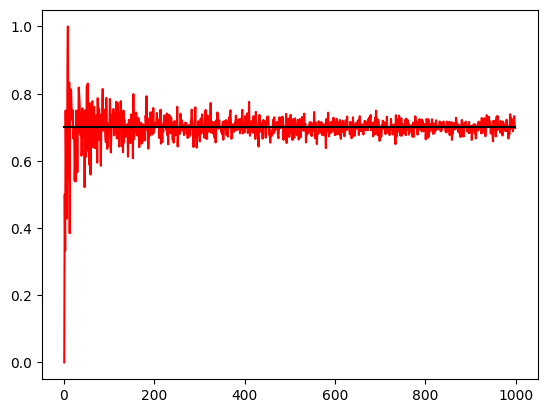

In [34]:
def proporcion_estimada(N):
    muestra = [experimento_moneda_cargada() for _ in range(N)]
    prop = sum(1 for e in muestra if sale_cara(e))/N
    return prop

N=1000
rd.seed(123)
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='red')
plt.plot(enes,proba, color='black');

Los puntos rojos son estimaciones de $p$ para cada $n$ (que en nuestra simulación es $N$). En rojo vemos la línea que corresponde al verdadero valor de $p$ que, en nuestro caso, es $0.7$.

¡Claro! Lo que vemos es que, al aumentar la cantidad de repeticiones del experimento, $n$, la estimación de la probabilidad dada por $f_n=\overline{X}_n$ converge al parámetro $p$, que en el ejemplo de la moneda cargada era $0.7$. Esto es así por la **Ley de los grandes números**.

De hecho, podés observar que, para $n$ "chicos" (por ejemplo, menores que 10), las estimaciones no son nada buenas...

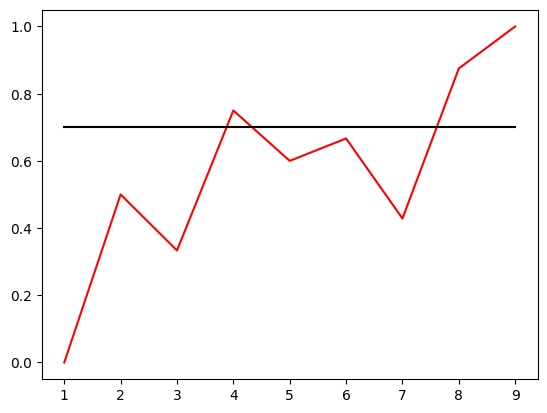

In [13]:
N=10
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='red')
plt.plot(enes,proba, color='black');

En términos de nuestro ejemplo, esto equivale a decir que **es muy difícil darse una idea de si la moneda está cargada lanzándola solamente 10 veces (o menos)**. Sin embargo, esto parece que empieza a revertirse a medida que aumentamos la cantidad de lanzamientos. Veamos qué ocurre cuando tenemos hasta 30 lanzamientos...

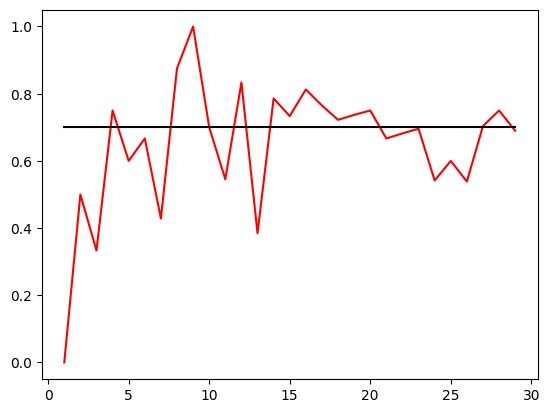

In [14]:
N=30
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='red')
plt.plot(enes,proba, color='black');

Para $n=30$, en este caso, ya empieza a verse alguna tendencia. Con $n=50$, parece detectarse mejor aún.

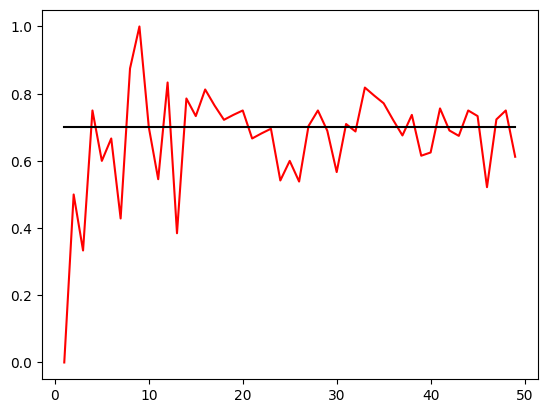

In [15]:
N=50
rd.seed(123)
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='red')
plt.plot(enes,proba, color='black');

¿Te animás a probar qué ocurre con $n=5000$?

### Ejemplo 2: La media

¿Sólo podremos estimar probabilidades con la Ley de los Grandes Números? ¡Claro que no! Este resultado de convergencia casi que nos sugiere que siempre que usemos $\overline{X}_n$ estaremos estimando $E(X)$. Es decir, la media muestral parece estimar muy bien a la esperanza.

Existen muchas estrategias de estimación y el estudio de las propiedades deseables que queremos que estos estimadores tengan escapan al objetivo de este curso. Sin embargo, inspeccionemos a partir de simulaciones algunos ejemplos.

Sea $X$ la variable aleatoria normal con esperanza $\mu$ y varianza $\sigma^2$. Es decir $X\sim N(\mu,\sigma^2)$. Repliquemos el estudio que hicimos en el Notebook 3 de Python para la variable aleatoria $X\sim N(170,5^2)$, que representaba el siguiente fenómeno:

$$X: \text{ altura (en centímetros) de las personas de Argentina}.$$

In [20]:
# Definimos los parámetros de la normal
mu = 170
sigma = 5

# La definimos
normal = stats.norm(mu, sigma)

# Obtenemos sus momentos
esperanza, varianza = normal.stats(moments='mv')

Ya sabemos que la esperanza de esta variable es $170$, es decir, $E(X)=170$. Sin embargo, en la vida real, rara vez conocemos los parámetros de una población. ¿Qué hacemos en esos casos? Tomamos, bajo ciertos reparos, una muestra de esa población y esperamos que esa muestra "nos dé algo de información" sobre el fenómenos que desconocemos. Algo parecido a lo que ocurría con la moneda cargada: no sabemos cuál es la probabilidad de que salga cara, pero podemos lanzarla muuuuuuuuuchas veces (LGN) y con la frecuencia relativa de "cara" estimar esa probabilidad (parámetro) desconocida.

Entonces, para lo que sigue, supongamos que tenemos una muestra de $n$ personas de esta población. Es decir, tomamos la altura de $n$ personas de Argentina y, con ellas quisiéramos darnos una idea de cual es la altura media de la población. ¿Cómo vamos a estimar $E(X)=\mu$?

Como vimos, por la LGN, un estimador que parece razonables es $\overline{X}_n$. Es decir, ¡el promedio de las alturas de la muestra! Simulémoslo y veamos qué tal nos va con esa estimación y con la convergencia a medida que variamos el tamaño de muestra.

Comencemos por generar una muestra de tamaño $n=10$ y usémosla para estimar $\mu$.

In [33]:
n = 10
rd.seed(123)
muestra = stats.norm.rvs(mu, sigma, n)
np.mean(muestra)

168.0124704380312

¡Nada mal! Con apenas 10 datos, parece que obtenemos una estimación bastante aceptable de la verdadera esperanza. Simulemos para diferentes $n$.

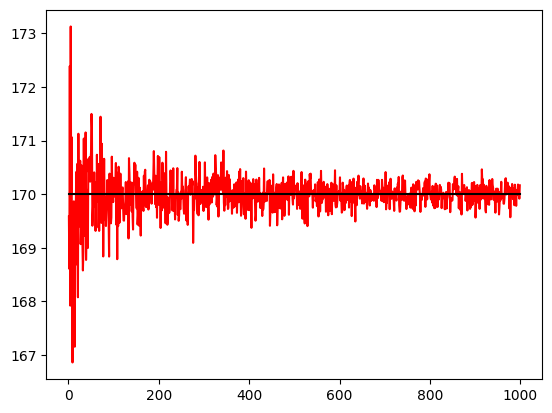

In [32]:
def media_estimada(N):
    rd.seed(123)
    muestra = stats.norm.rvs(mu, sigma, N)
    media = np.mean(muestra)
    return media

N=1000
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='red')
plt.plot(enes,esp, color='black');

Los puntos rojos son estimaciones de $\mu$ para cada $n$ (que en nuestra simulación es $N$). En rojo vemos la línea que corresponde al verdadero valor de $\mu$ que, en nuestro caso, es $170$.

¡Claro! Lo que vemos es que, al aumentar el tamaño de muestra $n$, la estimación de la esperanza $\mu$ dada por el promedio muestral $\overline{X}_n$ converge a $\mu$, que en el ejemplo de las alturas era $170$.

Como hicimos antes, observemos qué ocurre para $n$ "chicos" (por ejemplo, menores que 10, que 30 y que 50).

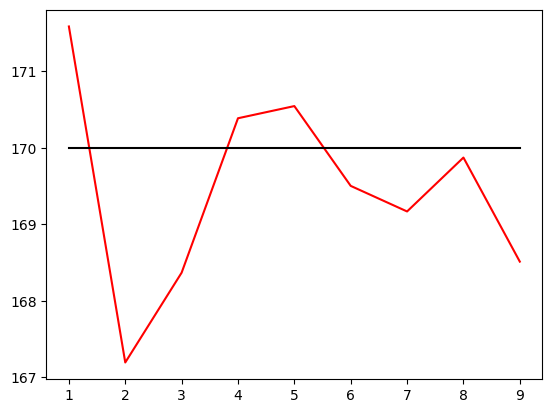

In [35]:
N=10
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='red')
plt.plot(enes,esp, color='black');

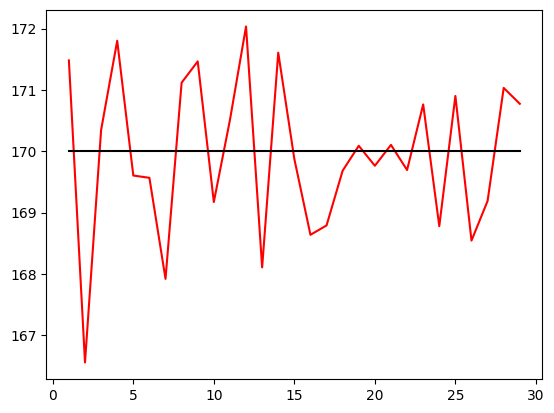

In [36]:
N=30
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='red')
plt.plot(enes,esp, color='black');

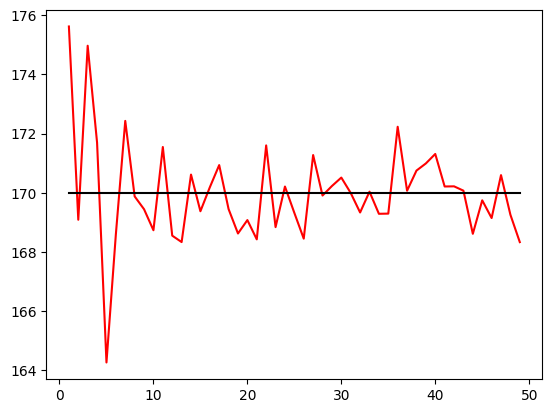

In [37]:
N=50
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='red')
plt.plot(enes,esp, color='black');

### Propiedades de $\overline{X}_n$
Lo que ocurre con $\overline{X}_n$ es que, al aumentar $n$ al infinito, ¡deja de tener variabilidad para concentrarse completamente en $E(X)$. Gráficamente podemos convencernos...

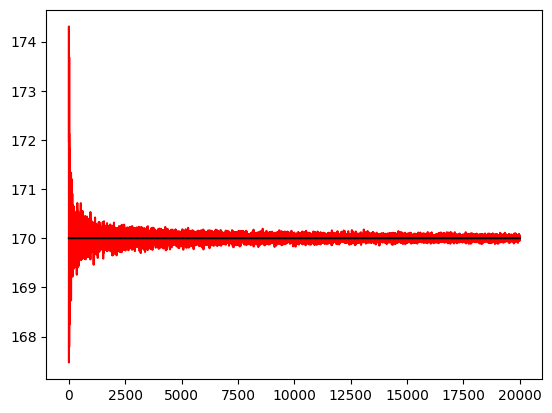

In [48]:
N=20000
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='red')
plt.plot(enes,esp, color='black');

Aunque también podemos convencernos "matemáticamente", usando las propiedades de varianza que conocemos. Notemos que $\overline{X}_n$ es una variable aleatoria. ¡No sabemos su distribución, en general! Sin embargo, como las $X_i$ son todas variables independientes y con igual distribución, por lo tanto, podremos calcular su esperanza y su varianza.

####   **Esperanza de $\overline{X}_n$**

$$
\begin{aligned}
E(\overline{X}_n)&=E\left(\frac{\sum_{i=1}^{n}X_i}{n}\right)\\
&=\frac{1}{n}E\left(\sum_{i=1}^{n}X_i\right)\\
&=\frac{1}{n}\sum_{i=1}^{n}\left(E(X_i)\right)\\
&=\frac{1}{n}n\cdot E (X)\\
&=E (X)\\
\end{aligned}
$$

####   **Varianza de $\overline{X}_n$**

$$
\begin{aligned}
V(\overline{X}_n)&=V\left(\frac{\sum_{i=1}^{n}X_i}{n}\right)\\
&=\frac{1}{n^2}V\left(\sum_{i=1}^{n}X_i\right)\\
&=\frac{1}{n^2}\sum_{i=1}^{n}\left(V (X_i)\right)\\
&=\frac{1}{n^2}n\cdot V (X)\\
&=\frac{V(X)}{n}\\
\end{aligned}
$$

**¿Qué quiere decir esto?** Que la variable $\overline{X}_n$ está centrada en $E(X)$ y que su varianza se va a $0$ cuando $n$ tiende a infinito.

¡Y esto es precisamente lo que vemos gráficamente! La media muestral se concentra en la esperanza y su varianza es cada vez más pequeña a medida que aumentamos $n$.

#### **Distribución de $\overline{X}_n$**

Ya vimos que:

*   $\overline{X}_n$ es una variable aleatoria,

*   $\overline{X}_n$ está centrada en $E(X)$ y que

*   $\overline{X}_n$ tiene varianza $\frac{V(X)}{n}$, es decir, su varianza se va a $0$ cuando $n$ tiende a $\infty$.

**Y lo sorprendente es que todo esto vale ¡sin importar qué distribución tengan las $X_i$!** No importa si son discretas o continuas, si son uniformes, normales, exponenciales, o no tienen distribución conocida... mientras estén bien definidos sus momentos (esperanza y varianza), la variable aleatoria que resulte de promediar una muestra de estas $X_i$ tendrá todas esas características.

En algún sentido, lo que estamos diciendo es que el promedio tiende a "matar" la variabilidad de las cosas que promedia, llevándolas a un centro común.

Pero, ¿sabemos cómo se distribuye, en general, $\overline{X}_n$? ¡No! No lo sabemos en general: es algo que depende fuertemente de la distribución de las $X_i$. Sin embargo... **¡sí sabemos cuál es su distribución límite!** Es decir, la distribución cuando $n \longrightarrow \infty$. Eso da pie para introducir el **Teorema Central del Límite** en la próxima sección.

## Teorema central del límite



# ¡Yapa! Dos estimadores para un mismo parámetro. ¿Qué tal se comportan?

Sea $X$ la variable aleatoria con distribución uniforme en el intervalo $(a,b)$. Es decir, $X\sim U(a,b)$. A lo largo de esta sección, vamos a revisar con Python aquellos que estudiamos en el Libro 3. En particular, para lo que sigue, vamos a estudiar $X\sim U(0,20)$.

In [49]:
# Definimos los extremos del intervalo de la uniforme
a = 0
b = 20

# Longitud del intervalo
l = b-a

# La definimos
uniforme = stats.uniform(a, l)

# Obtenemos sus momentos
esperanza, varianza = uniforme.stats(moments='mv')

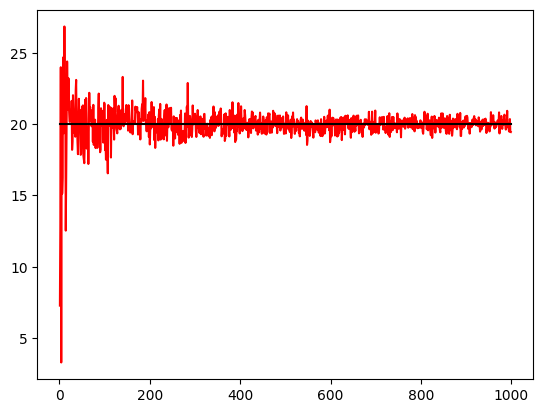

In [51]:
def estimador_1(N):
    rd.seed(123)
    muestra = stats.uniform.rvs(a, l, N)
    est1 = 2*np.mean(muestra)
    return est1

N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_1(n) for n in enes], color='red')
plt.plot(enes,param, color='black');

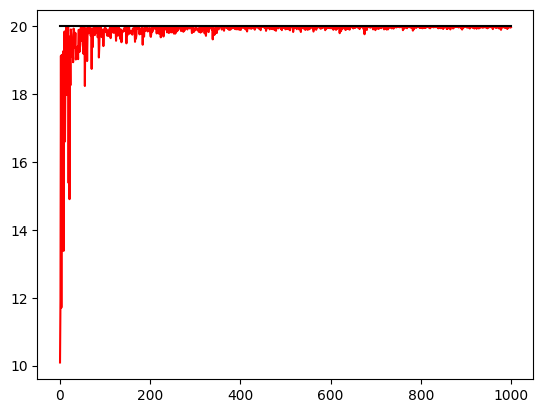

In [52]:
def estimador_2(N):
    rd.seed(123)
    muestra = stats.uniform.rvs(a, l, N)
    est2 = max(muestra)
    return est2

N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_2(n) for n in enes], color='red')
plt.plot(enes,param, color='black');

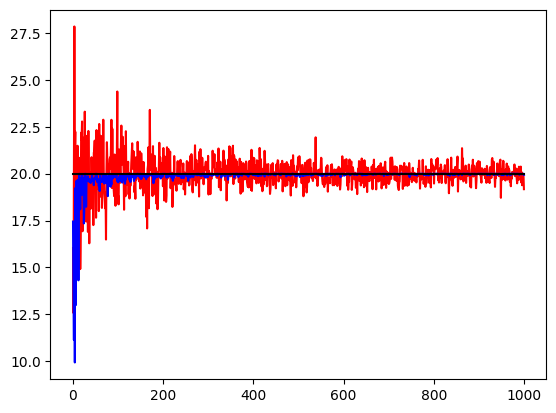

In [54]:
N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_1(n) for n in enes], color='red')
plt.plot(enes,[estimador_2(n) for n in enes], color='blue')
plt.plot(enes,param, color='black');